In [1]:
import numpy as np
fruits = np.load('../data/fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

In [3]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
pca.fit(fruits_2d)
print(pca.components_.shape) # there are 50 principal components

(50, 10000)


In [4]:
import matplotlib.pyplot as plt
def draw_fruits(arr, ratio=1):
    n = len(arr)
    # draw 10 images per 1 row.
    rows = int(np.ceil(n/10))
    # cols = rows < 2 ?? n : 10
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols, figsize=(cols*ratio, rows*ratio), squeeze = False)
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

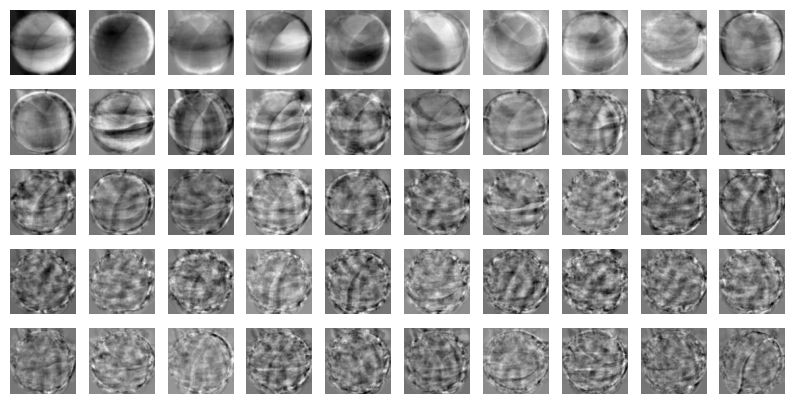

In [5]:
draw_fruits(pca.components_.reshape(-1, 100, 100))

In [6]:
print(fruits_2d.shape)

(300, 10000)


In [7]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape) # 10,000 features have been compressed to 50 feature(component)s

(300, 50)


(300, 10000)


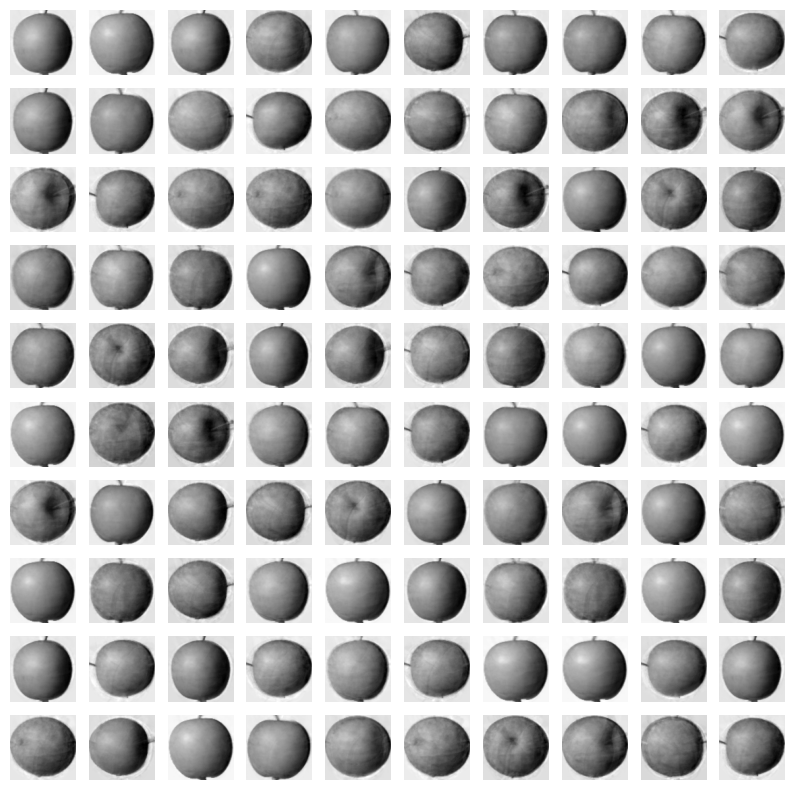

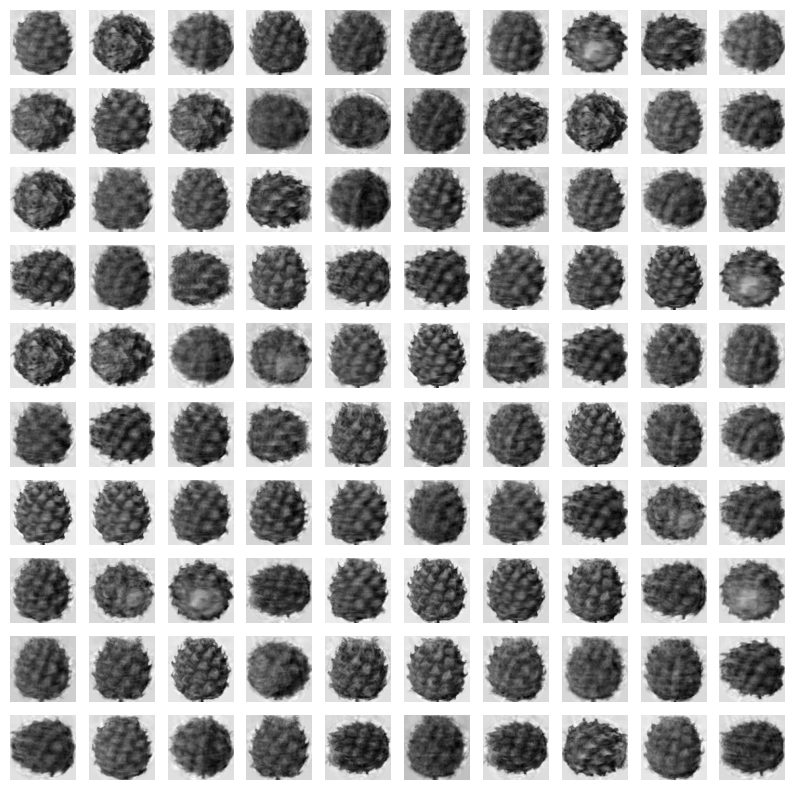

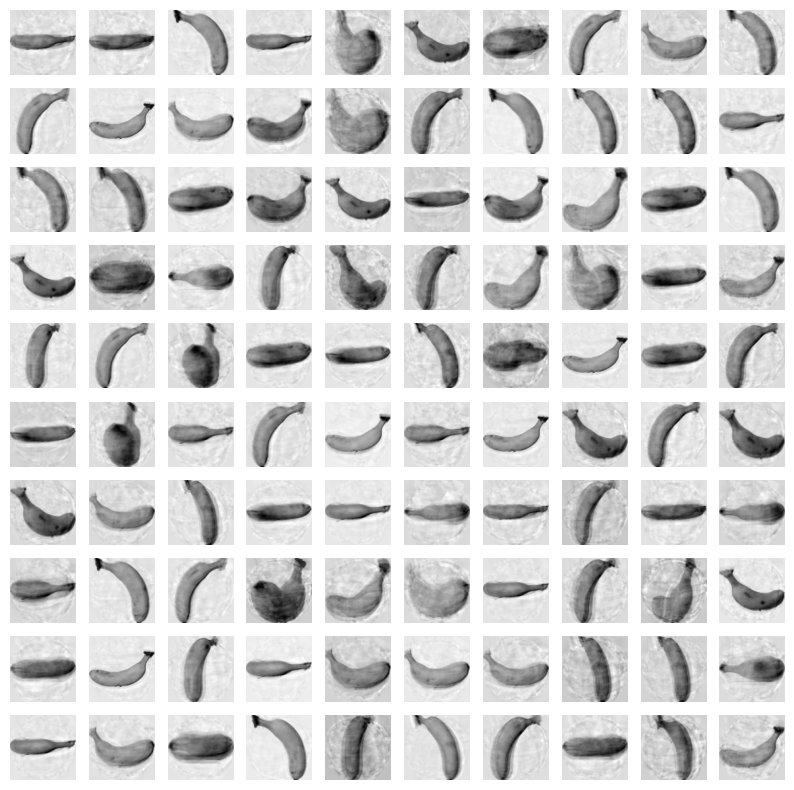

In [9]:
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)
for start in [0, 100, 200]:
    draw_fruits(fruits_reconstruct[start:start+100])
    print('\n')

## Explained variance

In [10]:
print(np.sum(pca.explained_variance_ratio_))

0.921533684560702


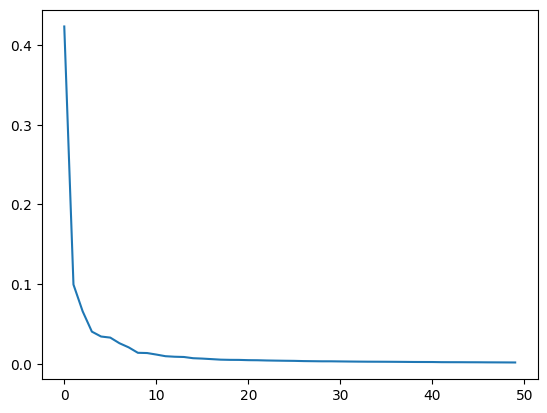

In [11]:
plt.plot(pca.explained_variance_ratio_)
plt.show() # components around 1~10 can describe the most of variance

In [12]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
target = np.array([0] * 100 + [1] * 100 + [2] * 100)

In [14]:
from sklearn.model_selection import cross_validate

scores = cross_validate(lr, fruits_2d, target)
print(f'test score: {np.mean(scores["test_score"])}')
print(f'fit time: {np.mean(scores["fit_time"])}')

test score: 0.9966666666666667
fit time: 0.8716997146606446


In [15]:
scores = cross_validate(lr, fruits_pca, target)
print(f'test score: {np.mean(scores["test_score"])}')
print(f'fit time: {np.mean(scores["fit_time"])}')

test score: 1.0
fit time: 0.0475731372833252


In [23]:
ratio = 0.5
pca = PCA(n_components=ratio)
pca.fit(fruits_2d)
print(f'{ratio * 100}% of variance can be described with {pca.n_components_} components')

50.0% of variance can be described with 2 components


In [24]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


In [27]:
scores = cross_validate(lr, fruits_pca, target)
print(f'test score: {np.mean(scores["test_score"])}')
print(f'fit time: {np.mean(scores["fit_time"])}')

c:\Users\sapph\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


test score: 0.99
fit time: 0.05788235664367676


c:\Users\sapph\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42, n_init='auto')
km.fit(fruits_pca)
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2]), array([110,  99,  91], dtype=int64))


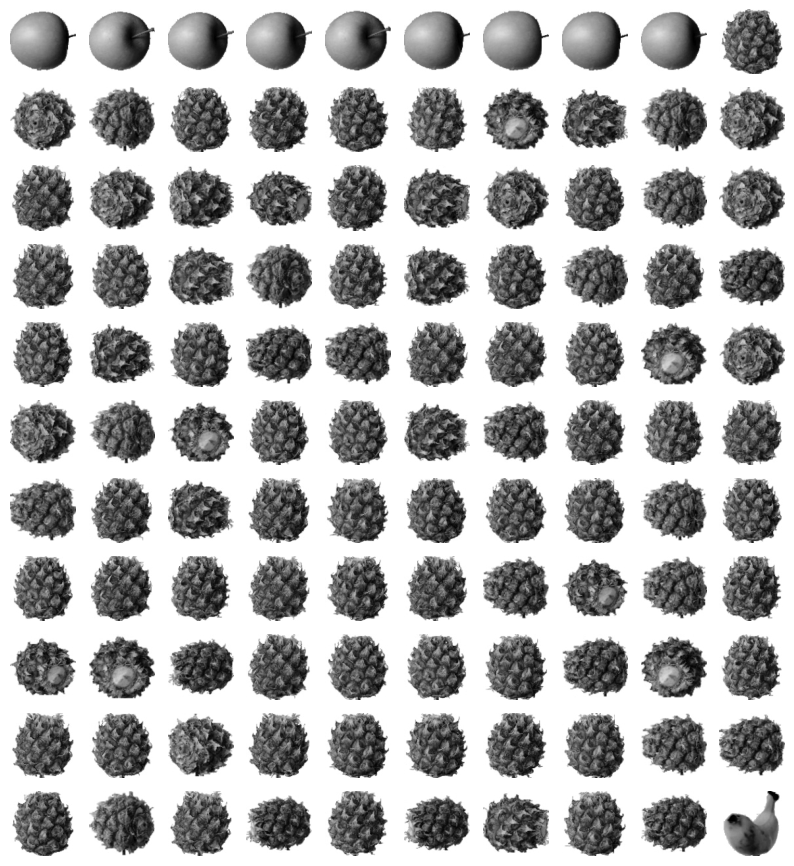

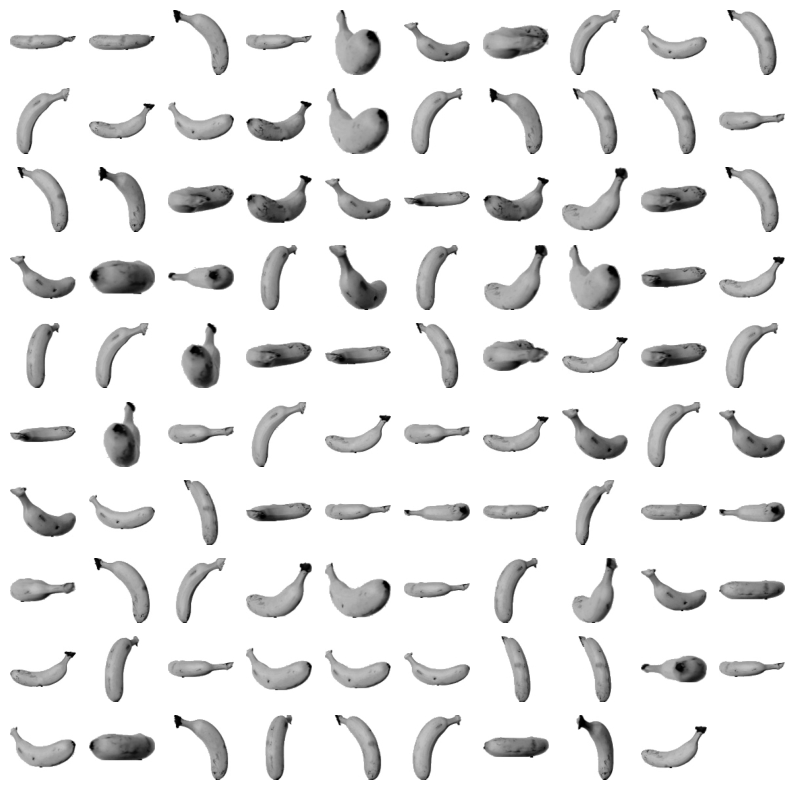

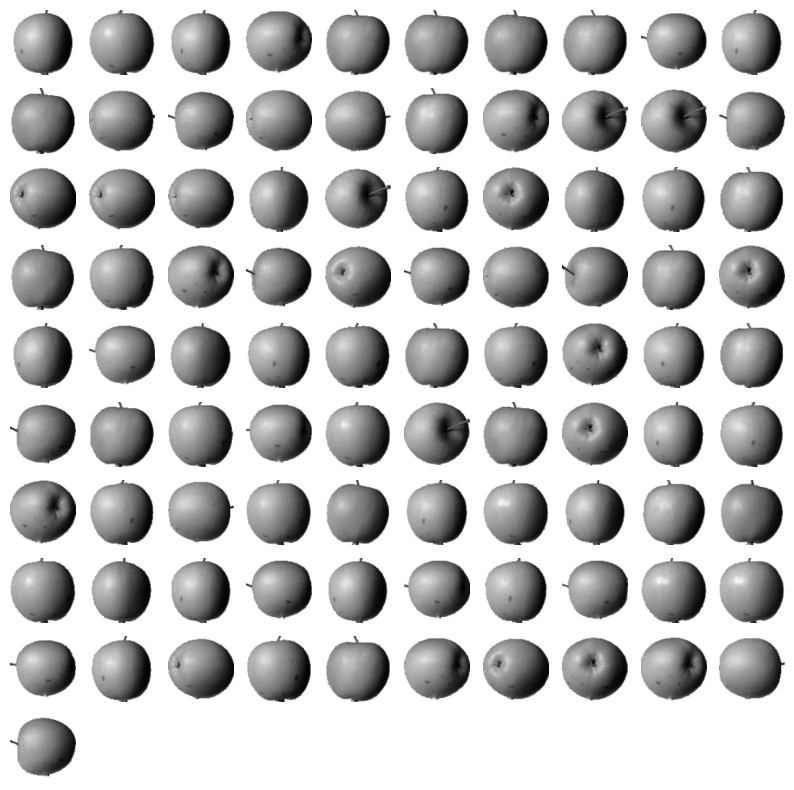

In [31]:
for label in range(0, 3):
    draw_fruits(fruits[km.labels_ == label])
    print("\n") # some of apples are classified as pineapple

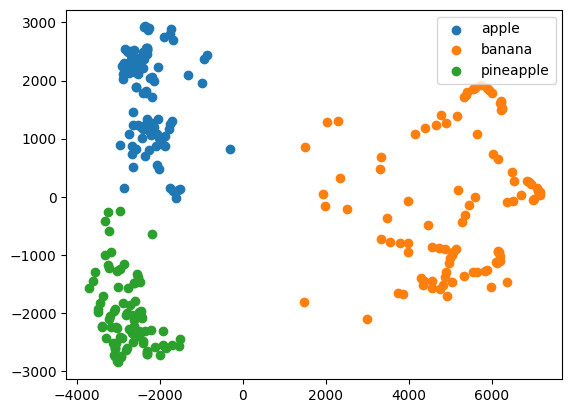

In [32]:
for label in range(0, 3):
    data = fruits_pca[km.labels_ == label]
    plt.scatter(data[:, 0], data[:, 1])
plt.legend(['apple', 'banana', 'pineapple'])
plt.show()